# Load json files for data cleaning

In [1]:
import io
import matplotlib.pyplot as plt
import csv
import json
import re
import pandas as pd
import seaborn as sns
import numpy as np
import math
userdatapath= '/home/titli/Documents/Springboard1/user_1000.csv'
source1= '/home/titli/Documents/Springboard1/dataset/user.json'
source2= '/home/titli/Documents/Springboard1/dataset/review.json'
numsamples=1000
numsamples1=2500000

Visually inspect and save to csv file.

In [2]:
user_data = []
count=0
with open(source1) as f:
     for line in f:
         count+=1
         if count <= numsamples:
            user_data.append(json.loads(line))
         else:
             break
         #user_data.append(json.dump(o[i:i+chunksize]))       
f.close()
df = pd.DataFrame(user_data)
df.to_csv(userdatapath)

In [3]:
df.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,4.67,0,0,0,0,0,0,0,0,1,...,0,[],0,"[cvVMmlU1ouS3I5fhutaryQ, nj6UZ8tdGo8YJ9lUMTVWN...",0,Johnny,8,0,oMy_rEb0UBEmMlu-zcxnoQ,2014-11-03
1,3.70,0,0,0,0,0,0,0,0,0,...,0,[],0,"[0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gp...",0,Chris,10,0,JJ-aSuM4pCFPdkfoZ34q0Q,2013-09-24
2,2.00,0,0,0,0,0,0,0,0,0,...,0,[],0,[],0,Tiffy,1,0,uUzsFQn_6cXDh6rPNGbIFA,2017-03-02
3,4.67,0,0,0,0,0,0,0,0,0,...,0,[],0,[],0,Mark,6,0,mBneaEEH5EMyxaVyqS-72A,2015-03-13
4,4.67,0,0,0,0,0,0,0,0,0,...,0,[],0,[],0,Evelyn,3,0,W5mJGs-dcDWRGEhAzUYtoA,2016-09-08


In [4]:
df.tail()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
995,5.00,0,0,0,0,0,0,0,0,0,...,0,[],0,"[ZBaTuWJi-nDS9FUJwTSVAw, FxFDm7TP6Nw7bbxf24XVn...",0,Doug,1,0,NIv39oMr4QamFN5tzXO0Xw,2011-09-03
996,3.77,0,0,0,0,0,0,0,0,0,...,1,[],0,"[r1jOXVDgen4cEcXGa5wufA, he8a9HfiljTcSXmSwQA4h...",0,Connie,13,0,6o99-IdLHQK0aaltMPnH2g,2013-06-26
997,3.65,3,0,3,2,0,2,5,0,9,...,4,[],2,"[OAWpekCm6f9E4Asq6yZ9IA, VNB00vigcEwy9W5GbFNuk...",6,Shamar,34,16,waPofWDAQbuKJkoswUbheQ,2010-02-03
998,5.00,0,0,0,0,0,0,0,0,0,...,0,[],0,"[IS4V_Uz8vDnFinimcCNwZA, f_RL_CTn5h-RRio_RqKq6...",0,Rachel,3,0,Rh6OqKamXd7klNQPwQ6u4Q,2016-10-21
999,4.05,3,0,3,0,0,1,0,2,0,...,0,[2017],2,"[kf6ZeyYcSsrLkefr9dRLuQ, Jqj0dpRFPuSj5f3w4CEPS...",0,Brandon,37,0,DK-5tzyRzslV35n9yCyFMA,2016-09-16


In [5]:
df.columns

Index(['average_stars', 'compliment_cool', 'compliment_cute',
       'compliment_funny', 'compliment_hot', 'compliment_list',
       'compliment_more', 'compliment_note', 'compliment_photos',
       'compliment_plain', 'compliment_profile', 'compliment_writer', 'cool',
       'elite', 'fans', 'friends', 'funny', 'name', 'review_count', 'useful',
       'user_id', 'yelping_since'],
      dtype='object')

In [6]:
df.shape

(1000, 22)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
average_stars         1000 non-null float64
compliment_cool       1000 non-null int64
compliment_cute       1000 non-null int64
compliment_funny      1000 non-null int64
compliment_hot        1000 non-null int64
compliment_list       1000 non-null int64
compliment_more       1000 non-null int64
compliment_note       1000 non-null int64
compliment_photos     1000 non-null int64
compliment_plain      1000 non-null int64
compliment_profile    1000 non-null int64
compliment_writer     1000 non-null int64
cool                  1000 non-null int64
elite                 1000 non-null object
fans                  1000 non-null int64
friends               1000 non-null object
funny                 1000 non-null int64
name                  1000 non-null object
review_count          1000 non-null int64
useful                1000 non-null int64
user_id               1000 non-null object
yelpin

Unique values in stars

In [8]:
df.average_stars.value_counts(dropna=False)

5.00    245
1.00     97
3.00     66
4.00     49
2.00     30
3.67     25
2.33     16
4.50     16
3.50     15
4.67     14
4.33     11
3.60      9
2.50      9
4.20      8
3.86      7
4.17      7
3.75      6
1.50      6
4.10      6
3.25      6
4.40      6
4.60      6
2.60      6
3.33      6
3.82      5
3.40      5
3.70      5
3.71      5
2.25      5
3.80      5
       ... 
4.02      1
3.47      1
2.63      1
2.65      1
3.64      1
4.03      1
2.56      1
2.95      1
3.99      1
4.65      1
4.11      1
2.07      1
2.09      1
2.85      1
3.91      1
4.08      1
4.55      1
3.09      1
2.46      1
3.87      1
1.30      1
4.79      1
3.66      1
2.14      1
2.89      1
4.16      1
3.48      1
4.01      1
1.67      1
3.19      1
Name: average_stars, Length: 180, dtype: int64

In [9]:
df.describe()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,fans,funny,review_count,useful
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.656530,4.974000,0.411000,4.974000,3.623000,0.26200,0.607000,1.986000,1.716000,4.268000,0.46500,2.246000,18.32400,2.496000,12.746000,28.404000,26.989000
std,1.238213,39.141709,4.596216,39.141709,31.043688,3.72199,5.452181,12.083369,17.549568,30.379847,5.47053,19.355623,198.52512,11.876491,110.827579,94.234308,207.810077
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
50%,3.860000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,3.000000,0.000000
75%,4.885000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,11.000000,2.000000
max,5.000000,764.000000,120.000000,764.000000,599.000000,92.00000,138.000000,221.000000,418.000000,490.000000,151.00000,449.000000,5215.00000,159.000000,1944.000000,1262.000000,4749.000000


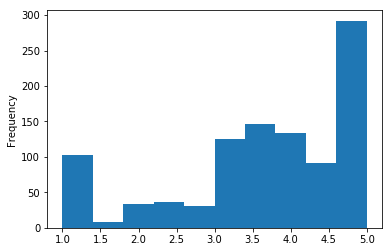

In [11]:
df.average_stars.plot('hist')

Find Outliers

In [14]:
df[df.compliment_funny > 200]

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
545,4.00,764,120,764,599,92,138,221,197,466,...,1681,"[2012, 2011, 2013, 2010]",95,"[T78RIzZ3VPQ9C8njU_VIuA, gxSDEZYcRn_uFWZzQCDKr...",1853,Jan,462,2166,bBRPy8zUvNc0NGbGmkjrZg,2009-03-30
656,3.72,310,16,310,248,15,19,76,44,131,...,24,"[2011, 2010, 2009, 2012]",46,"[duEhqH-mtI4qIyIh3NCn9A, Sndz5pnHkoCRsxS7vRkMN...",38,Christine,496,24,37Hc8hr3cw0iHLoPzLK6Ow,2008-03-03
891,3.96,637,49,637,540,32,56,156,252,450,...,325,"[2014, 2013, 2011, 2016, 2012, 2015, 2017]",159,"[37Hc8hr3cw0iHLoPzLK6Ow, 3Gyy-Qtw6VsmDozjmu3IF...",324,Julie,454,344,DONwuwg9iySZ7LFjtcHdCA,2010-02-09
959,3.49,309,10,309,144,0,18,119,418,490,...,1590,"[2015, 2016, 2014, 2017, 2013, 2011, 2010, 2012]",41,"[BE4fE4R3TaVn8xy4sYYjbg, lPNsKsD-HvdgkzfGq-Gji...",1729,Peter,596,1831,m8nDqQ7a3zQWfkNK1_vwnQ,2009-06-30
973,3.72,407,13,407,262,1,71,126,106,245,...,838,[],25,"[w0LMR4P87Bcr4PVcGUcYtg, lPNsKsD-HvdgkzfGq-Gji...",835,Dee,77,870,eJq-oRVNa4XMRXp0513AMA,2012-03-29


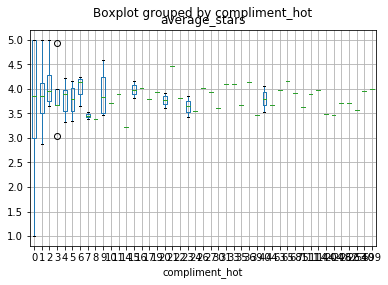

In [15]:
df.boxplot(column='average_stars', by='compliment_hot')

# Data Wrangling on user data

Convert date-time 'yelping_since' column to numerical for using in machine learning

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6eda5013c8>,
      dtype=object)

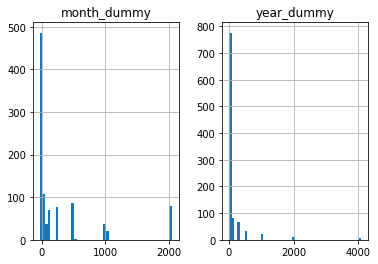

In [23]:
def getnumericyear(A):
    years= ['2004','2005','2006', '2007', '2008' ,'2009', '2010', '2011', '2012', '2013', '2014', '2015', 
        '2016', '2017', '2018']
    for i, x in enumerate(years):
        if (A in x)==True:
            return i+1
def getnumericmonth(B):
    months=['01','02', '03', '04', '05', '06', '07','08', '09', '10', '11','12']
    for i, x in enumerate(months):
        if (B in x)==True:
            return i+1
Xyear=df['yelping_since']   
df1 = []
for k in range(0,numsamples):
    dyear=(Xyear.iloc[k]).split("-")
    rr1= np.int_(np.concatenate([np.zeros(getnumericmonth(dyear[1])-1),[1],np.zeros(12-getnumericmonth(dyear[1]))]).tolist()) 
    month_d= (int('1'+''.join(map(str, rr1)),2))+ int(dyear[2])-4127 # subtract mode
    rr2= np.int_(np.concatenate([np.zeros(getnumericyear(dyear[0])-1),[1],np.zeros(15-getnumericyear(dyear[0]))]).tolist()) 
    year_d=(int('1'+''.join(map(str, rr2)),2))-32770
    df1.append({'year_dummy': year_d, 'month_dummy': month_d })
            
    
df_yelp=pd.DataFrame(df1)
#sns.heatmap(df_yelp, annot=True)
df_yelp.hist(bins=50)

Count number of friends

In [31]:
df['friends'].replace(to_replace= '[]', value=np.nan, inplace=True)
df['friends'].fillna(value='0', inplace=True) 
df['friends'].head()
df2 = []
for k in range(0,numsamples):
    count=0
    Xfrnd=(df['friends'].iloc[[k]].values).tolist()
    dfrnd = (", ".join(Xfrnd)).split(',')[1:-1]
    if dfrnd is None:
       df2.append({'friend_count': 0})  
       break
    else:
       count=len(dfrnd)
       df2.append({'friend_count': count})    
df_frnd=pd.DataFrame(df2)
df_frnd.head()

,friend_count
0,9
1,77
2,0
3,0
4,0


# Load Review data 

In [27]:
review_data=[]
count=0
with open(source2) as f:
     for line in f:
         if count > numsamples1:
            review_data.append(json.loads(line))
         else:
            count+=1
             #break
         #user_data.append(json.dump(o[i:i+chunksize]))       
f.close()
dfrev = pd.DataFrame(review_data)

Get review values in text file comparing on user_id.

In [28]:
def getreview(str,num):
    
    dfrev2=dfrev[dfrev.user_id == str]
    n=len(df2)
    for k in range(0,n):
        star= dfrev2['stars'].iloc[[k]].values
        date= dfrev2['date'].iloc[[k]].values
        text= dfrev2['text'].iloc[[k]].values
        useful= dfrev2['useful'].iloc[[k]].values
        funny = dfrev2['funny'].iloc[[k]].values
        cool  = dfrev2['cool'].iloc[[k]].values
        printreview(num,star,date,text,useful,funny,cool)
                
 
    return
######################################################    
           
            
def printreview(num,star,date,text,useful,funny,cool):
    
    fh = open("testsample%s.txt" % num, "a")
    fh.write("<Star>%s \n" %str(star))
    fh.write("\t<Date>%s \n" %str(date))
    fh.write("\t<Useful>%s \n" %str(useful))
    fh.write("\t\t<Funny>%s \n" %str(funny))
    fh.write("\t\t<Cool>%s \n" %str(cool))
    fh.write("\t\t\t<Review>%s \n" %(str(text)).encode('utf-8'))
       
    fh.close()
    return       
#############################main #

df=pd.read_csv(userdatapath, header=0,  index_col=0, nrows=numsamples)
user_header= ['user_id', 'name', 'review_counts', 'yelping_since', 'useful', 'funny', 'cool'
'fans', 'elite', 'average_stars', 'compliment_hot', 'compliment_more', 'compliment_profile','compliment_hot',
'compliment_cute', 'compliment_list', 'compliment_note', 'compliment_plain', 'compliment_cool', 'compliment_funny', 
'compliment_writer', 'compliment_photos','friends', 'review_stars', 'review_date', 'review', 
'review_useful', 'review_funny', 'review_cool'] 

for k in range(0,1000):
    str2=''.join(df['user_id'].iloc[[k]].values)
    print(k)
    getreview(str2,k)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27